# Задача классификации. Практика

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

В этом домашнем задании вы будете решать задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_first_step_in_nlp/main/datasets/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
len(df.columns)


20

## Сделаем первичную обработку данных:



1) Выбросите колонку State. Cколько столбцов осталось в матрице df?

In [ ]:
df = df.drop("State", axis='columns')

In [ ]:
len(df.columns)


19

2) Сделайте простую кодировку признаков в колонках International plan и Voice mail plan

In [ ]:
df['International plan'] = df['International plan'].map({'Yes' : 1, 'No' : 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes' : 1, 'No' : 0})

3) Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [ ]:
df['Churn'] = df['Churn'].astype(int)

In [ ]:
df.head(3)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

Проверьте баланс классов целевой переменной. Является ли выборка сбалансированной?

**Вопрос:** сколько объектов относятся к классу 1?

In [ ]:
print(f'Кол-во объектов каждого класса: {y.value_counts()}')

Кол-во объектов каждого класса: Churn
0    2850
1     483
Name: count, dtype: int64


In [ ]:
# Проверка, является ли выборка сбалансированной
is_balanced = y.value_counts().min() / y.value_counts().max() > 0.5
print(f"\nВыборка сбалансирована: {is_balanced}")


Выборка сбалансирована: False


In [ ]:
# Количество объектов, относящихся к классу 1

num_class_1 = y.value_counts().get(1, 0)
print(f"Количество объектов в классе 1: {num_class_1}")

Количество объектов в классе 1: 483


Разбейте данные на тренировочную и тестовую части, размер тестовой части - 30%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому
отмасштабируйте признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


Обучите на тренировочных данных с параметрами по умолчанию:

1)  Логистическую регрессию

2)  Метод ближайших соседей

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lg = lr.predict(X_test)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте.

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности.

**Вопрос:** чему равен ROC-AUC логистической регрессии, округленный до десятых?

In [ ]:
print(round(roc_auc_score(y_test, y_pred_lg), 1))

0.6


#TF_IDF

Будем предсказывать зарплату по описанию вакансии - это задача регрессии!

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_first_step_in_nlp/main/datasets/salary_data_cleaned.csv")
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0


1) Посмотрите распределние целевой переменной

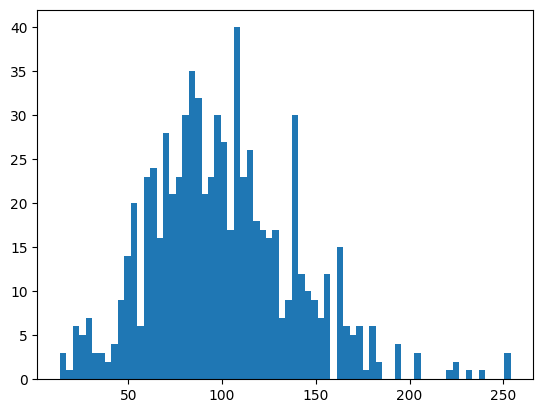

In [11]:
plt.hist(df.avg_salary, bins=70)
plt.show()

2) Разбейте данные на тренировочные и тестовые

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['Job Description'], df['avg_salary'], test_size = 0.2, random_state = 125)

3) Закодируйте колонку `Job Description` при помощи **tf-idf**

In [17]:
tfidf = TfidfVectorizer(min_df=5, max_df=1.0, ngram_range=(1,1))
tfidf.fit(X_train)

X_train_vec = tfidf.transform(X_train)
X_test_vec = tfidf.transform(X_test)


4) Обучите линейную регрессию Ridge на тренировочных данных и сделайте предсказания на тренировочных и тестовых данных.


In [20]:
model = Ridge(alpha=1.1)
model.fit(X_train_vec, y_train)

train_preds = model.predict(X_train_vec)
test_preds = model.predict(X_test_vec)

5) Посчитайте значение $R^2$ на тренировочных и на тестовых данных.

In [21]:
print("R^2 на тренировочных данных:", r2_score(y_train, train_preds))
print("R^2 на тестовых данных:", r2_score(y_test, test_preds))


R^2 на тренировочных данных: 0.7803122812306613
R^2 на тестовых данных: 0.6867690636285266


6) Потестируйте модель: посмотрите, как она оценивает зарплату "data scientist"

In [23]:
salary_data_scientist = model.predict(tfidf.transform(["data scientist"]))
print("Предполагаемая зарплата для data scientist:", salary_data_scientist)

Предполагаемая зарплата для data scientist: [112.26187976]


7) Посмотрим на веса модели

**Вопрос:** какой признак имеет наибольший положительный вес?

In [25]:
coefs = sorted(zip(list(np.array(tfidf.get_feature_names_out())[model.coef_ != 0]), model.coef_[model.coef_ != 0]),
               key=lambda x: -x[1])
coefs_df = pd.DataFrame(coefs, columns=["ngram", "weight"])
print("Наибольший положительный вес:", coefs_df.iloc[0]['ngram'])



# %%time
# coefs = sorted(zip(list(np.array(tfidf.get_feature_names())[model.coef_ != 0]), model.coef_[model.coef_ != 0]),
#                key=lambda x: -x[1])
# coefs = pd.DataFrame(coefs, columns=["ngram", "weight"])
# # ваш код здесь
# ...

Наибольший положительный вес: actuarial
